In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/kroger_members.csv')
print(data)

    kroger_id has_member_card
0           1               Y
1           2               Y
2           3             NaN
3           4               Y
4           5             NaN
..        ...             ...
95         96               Y
96         97             NaN
97         98               Y
98         99             NaN
99        100             NaN

[100 rows x 2 columns]


Part 1 – Basic Data Understanding (Pandas) :

In [ ]:
print(data.head(10)) #print first 10 rows


   kroger_id has_member_card
0          1               Y
1          2               Y
2          3             NaN
3          4               Y
4          5             NaN
5          6               Y
6          7             NaN
7          8               Y
8          9               Y
9         10               Y


In [ ]:
print("Shape:",data.shape) #print of the data set

Shape: (100, 2)


In [ ]:
print("Column Name:",data.columns)  #print columns names

Column Name: Index(['kroger_id', 'has_member_card'], dtype='object')


In [ ]:
print(data.dtypes)  #print the data type of each columns

kroger_id           int64
has_member_card    object
dtype: object


In [ ]:
print(data.isnull().sum())  #count the missing values

kroger_id           0
has_member_card    37
dtype: int64


In [ ]:
print(data.duplicated().sum())  #count the duplicates

0


In [ ]:
membership_count=data['has_member_card'].value_counts()  #count the customers with and without membership cards
print(membership_count)

has_member_card
Y    63
N    37
Name: count, dtype: int64


Part 2 – Data Cleaning:

In [ ]:
data['has_mamber_card']=data['has_member_card'].fillna('N')  #Fill missing values become N
print(data)

    kroger_id has_member_card has_mamber_card
0           1               Y               Y
1           2               Y               Y
2           3             NaN               N
3           4               Y               Y
4           5             NaN               N
..        ...             ...             ...
95         96               Y               Y
96         97             NaN               N
97         98               Y               Y
98         99             NaN               N
99        100             NaN               N

[100 rows x 3 columns]


In [ ]:
data['kroger_id']=data['kroger_id'].astype(int)  #cheak all the kroger_id's are integer

In [ ]:
if(data['kroger_id'].is_unique):  #cheak all kroger_id's are unique or not
  print("All kroger_id's are unique")
else:
  print("Not")

All kroger_id's are unique


In [ ]:
invalid=data[data['kroger_id']<=0]  # cheak any negative or invalid kroger_id
if not invalid.empty:
  print("Invalid kroger_id")
else:
  print("Valid kroger_id")

Valid kroger_id


In [ ]:
data=data.reset_index(drop=True)  #reset dataset index after cleaning

Part 3 – Exploratory Data Analysis (EDA):

In [ ]:
total_customers=len(data)  #count the number of customers
print(total_customers)

100


In [ ]:
member_count=data['has_member_card'].value_counts()  #count the member count
print(member_count)
non_member_count=(data['has_member_card']=='N').sum()
print("non-member_count:",non_member_count)

has_member_card
Y    63
N    37
Name: count, dtype: int64
non-member_count: 37


In [ ]:
percent_member=(member_count['Y']/total_customers)*100 #Find the percentage of customers who have a membership card
print(percent_member)

63.0


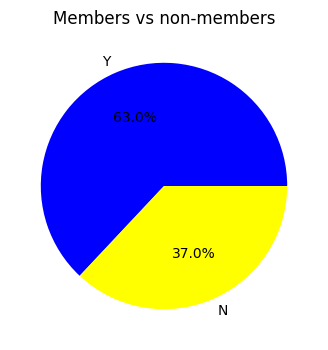

In [ ]:
#pie chart of members vs non-members.
plt.figure(figsize=(4,4))
plt.pie(member_count,labels=member_count.index,autopct='%1.1f%%',colors=['blue','yellow'])
plt.title("Members vs non-members")
plt.show()

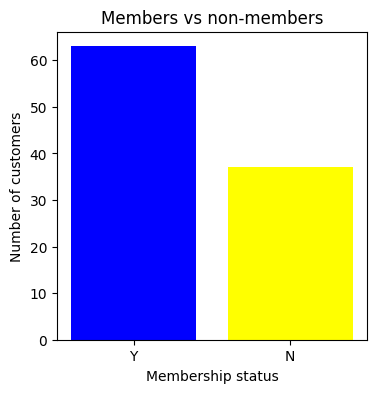

In [ ]:
#bar chart of members vs non-members.
plt.figure(figsize=(4,4))
plt.bar(member_count.index,member_count.values,color=['blue','yellow'])
plt.xlabel("Membership status")
plt.ylabel("Number of customers")
plt.title("Members vs non-members")
plt.show()

Part 4 – Statistics:

In [ ]:
data['member_numeric'] = data['has_member_card'].map({'Y': 1, 'N': 0})
mean=data['member_numeric'].mean()  #calculate mean of the membership card
print("Mean:",mean)
median=data['member_numeric'].median()  # calculate median of the membership card
print("Median:",median)
mode=data['member_numeric'].mode()[0]  # calculate mode of the membership card
print("Mode:",mode)

Mean: 0.63
Median: 1.0
Mode: 1


In [ ]:
prob_member=mean   #Probability that a random customer has a membership card.
print("probability of a membership card:",prob_member)
prob_non_member=1-mean   #Probability that a random customer does not have a membership card.
print("Probability of a not membership card:",prob_non_member)

probability of a membership card: 0.63
Probability of a not membership card: 0.37


Part 5 – Linear Algebra & NumPy :

In [ ]:
membership_binary=np.array(data['has_member_card'].map({'Y':1,'N':0}))  #Convert membership status into a binary NumPy array (1 for 'Y', 0 for 'N')
np.random.seed(42)
spend_score=np.random.randint(0,101,size=len(membership_binary))  #Create a random “spend score” array of the same size
print(spend_score)

[ 51  92  14  71  60  20  82  86  74  74  87  99  23   2  21  52   1  87
  29  37   1  63  59  20  32  75  57  21  88  48  90  58  41  91  59  79
  14  61  61  46  61  50  54  63   2 100  50   6  20  72  38  17   3  88
  59  13   8  89  52   1  83  91  59  70  43   7  46  34  77  80  35  49
   3   1   5  53   3  53  92  62  17  89  43  33  73  61  99  13  94  47
  14  71  77  86  61  39  84  79  81  52]


In [ ]:
vector_sum=membership_binary+spend_score  #fine the vector addition of membership_binary and spend_score
print(vector_sum)

[ 52  93  14  72  60  21  82  87  75  75  87  99  24   2  21  53   1  88
  30  37   2  63  60  21  32  76  57  22  88  49  90  59  42  92  60  80
  14  61  61  47  62  51  54  64   2 101  50   7  21  73  39  17   4  89
  60  14   8  89  53   2  84  92  60  71  44   8  47  35  78  80  35  49
   4   2   5  53   3  54  93  63  17  90  44  34  73  61 100  14  95  47
  14  72  78  87  62  40  84  80  81  52]


In [ ]:
print(np.dot(membership_binary,spend_score))  #print the dot product of membership_binary and spend_score

3388


In [ ]:
#print the matrix multiplications of features and weights
features=np.column_stack((membership_binary,spend_score))
weights=np.array([0.5,0.5])
matrix_multiplication=np.dot(features,weights)
print(matrix_multiplication)

[26.  46.5  7.  36.  30.  10.5 41.  43.5 37.5 37.5 43.5 49.5 12.   1.
 10.5 26.5  0.5 44.  15.  18.5  1.  31.5 30.  10.5 16.  38.  28.5 11.
 44.  24.5 45.  29.5 21.  46.  30.  40.   7.  30.5 30.5 23.5 31.  25.5
 27.  32.   1.  50.5 25.   3.5 10.5 36.5 19.5  8.5  2.  44.5 30.   7.
  4.  44.5 26.5  1.  42.  46.  30.  35.5 22.   4.  23.5 17.5 39.  40.
 17.5 24.5  2.   1.   2.5 26.5  1.5 27.  46.5 31.5  8.5 45.  22.  17.
 36.5 30.5 50.   7.  47.5 23.5  7.  36.  39.  43.5 31.  20.  42.  40.
 40.5 26. ]


Part 6 – Feature Engineering :

In [ ]:
data['Is_member']=data['has_member_card'].map({'Y':1,'N':0})  #create Is_member column (1 if 'Y', else 0)
print(data)

    kroger_id has_member_card has_mamber_card  member_numeric  Is_member  \
0         1.0               Y               Y               1          1   
1         2.0               Y               Y               1          1   
2         3.0               N               N               0          0   
3         4.0               Y               Y               1          1   
4         5.0               N               N               0          0   
..        ...             ...             ...             ...        ...   
95       96.0               Y               Y               1          1   
96       97.0               N               N               0          0   
97       98.0               Y               Y               1          1   
98       99.0               N               N               0          0   
99      100.0               N               N               0          0   

    monthly_spend  Discount_eligible spend_Quartile  
0          218.54                

In [ ]:
np.random.seed(42)
data['monthly_spend']=np.random.uniform(50,500,size=len(data)).round(2)  #create monthly_spend column random values become 50 and 500

In [ ]:
data['Discount_eligible']=np.where((data['Is_member']==1)&(data['monthly_spend']>200),1,0)  #Create a Discount_Eligible column

In [ ]:
data['spend_Quartile']=pd.qcut(data['monthly_spend'],q=4,labels=['Q1','Q2','Q3','Q4']) #Create membership quartiles based on Monthly_Spend.
print(data.head(10))

   level_0  index  kroger_id has_member_card has_mamber_card  member_numeric  \
0        0      0        1.0               Y               Y               1   
1        1      1        2.0               Y               Y               1   
2        2      2        3.0               N               N               0   
3        3      3        4.0               Y               Y               1   
4        4      4        5.0               N               N               0   
5        5      5        6.0               Y               Y               1   
6        6      6        7.0               N               N               0   
7        7      7        8.0               Y               Y               1   
8        8      8        9.0               Y               Y               1   
9        9      9       10.0               Y               Y               1   

   Is_member  monthly_spend  Discount_eligible spend_Quartile  
0          1         314.04                  2         

Part 7 – SQL Simulation in Pandas :

In [ ]:
high_spending_members=data[(data['Is_member']==1)& (data['monthly_spend']>300)]  #Select all customers who are members and spend more than $300 per month.
print(high_spending_members)

    level_0  index  kroger_id has_member_card has_mamber_card  member_numeric  \
0         0      0        1.0               Y               Y               1   
1         1      1        2.0               Y               Y               1   
12       12     12       13.0               Y               Y               1   
15       15     15       16.0               Y               Y               1   
17       17     17       18.0               Y               Y               1   
18       18     18       19.0               Y               Y               1   
22       22     22       23.0               Y               Y               1   
23       23     23       24.0               Y               Y               1   
29       29     29       30.0               Y               Y               1   
34       34     34       35.0               Y               Y               1   
40       40     40       41.0               Y               Y               1   
41       41     41       42.

In [ ]:
top_10_members=data[data['Is_member']==1].sort_values(by='monthly_spend',ascending=False).head(10) #top 10 highest spenders among members.
print(top_10_members)

    level_0  index  kroger_id has_member_card has_mamber_card  member_numeric  \
82       82     82       83.0               Y               Y               1   
1         1      1        2.0               Y               Y               1   
15       15     15       16.0               Y               Y               1   
17       17     17       18.0               Y               Y               1   
60       60     60       61.0               Y               Y               1   
49       49     49       50.0               Y               Y               1   
18       18     18       19.0               Y               Y               1   
29       29     29       30.0               Y               Y               1   
97       97     97       98.0               Y               Y               1   
12       12     12       13.0               Y               Y               1   

    Is_member  monthly_spend  Discount_eligible spend_Quartile  
82          1         498.98               

In [ ]:
sorted_customers=data.sort_values(by=['monthly_spend','kroger_id'],ascending=[False,True])  #Sort customers by Monthly_Spend descending and then by kroger_id ascending.
print(sorted_customers)

    kroger_id has_member_card has_mamber_card  member_numeric  Is_member  \
69       70.0               N               N               0          0   
11       12.0               N               N               0          0   
50       51.0               Y               Y               1          1   
34       35.0               Y               Y               1          1   
1         2.0               Y               Y               1          1   
..        ...             ...             ...             ...        ...   
58       59.0               Y               Y               1          1   
42       43.0               N               N               0          0   
98       99.0               N               N               0          0   
10       11.0               N               N               0          0   
72       73.0               Y               Y               1          1   

    monthly_spend  Discount_eligible spend_Quartile  
69         494.10                

In [ ]:
discount_count=data['Discount_eligible'].value_counts() #count discount count
print(discount_count)

Discount_eligible
0    62
1    38
Name: count, dtype: int64


Part 8 – Insights:

In [ ]:
member_percentage=data['Is_member'].mean()*100  #count membership percentage
print(member_percentage)

63.0


In [ ]:
avg_spend_member=data[data['Is_member']==1]['monthly_spend'].mean() #finding the member average spend
avg_spend_nonmember=data[data['Is_member']==0]['monthly_spend'].mean() #finding the non-members average spend
print("Members average spend:",avg_spend_member)
print("Non Members average spend:",avg_spend_nonmember)
if(avg_spend_member>avg_spend_nonmember):   #compare which is greater, member or non-member
  print("Members have a higher average monthly spend than non-members.")
else:
  print("Non members have a higher average monthly spend than members")

Members average spend: 281.667619047619
Non Members average spend: 227.37918918918916
Members have a higher average monthly spend than non-members.


In [ ]:
q4_avg=data[(data['Is_member']==1)&(data['spend_Quartile']=='Q4')]['monthly_spend'].mean()
q1_avg=data[(data['Is_member']==1)&(data['spend_Quartile']=='Q1')]['monthly_spend'].mean()
print(q4_avg-q1_avg)  #print spending difference between top quartile and bottom quartile members

310.5073949579832


In [ ]:
all_members=top_10_members['Is_member'].all()
if(all_members):   #cheak high spenders is always member or not
  print("High spender always members")
else:
  print("High spenders not always member")

High spender always members
